<a href="https://colab.research.google.com/github/IanWills03/Computational-Intelligence-Assessment/blob/main/Comp_Assessment_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
 *Part 1 - Classification with ANNs*
```



In [ ]:
#Section A - Dataset Preparation
import numpy as np
import pandas as pd
from google.colab import files
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Comp_Intelligence_Data_Sets/house-votes-84.data', header=None)
#This part loads the names of the house-votes eg. 'Democrat'
with open('/content/drive/MyDrive/Comp_Intelligence_Data_Sets/house-votes-84.names', 'r') as file:
    content = file.read()

df

Mounted at /content/drive


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,?,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,?,?,?,?,n,y,y,y,n,y


In [ ]:
#This part assigns each column a name
column_names = ['class_name', 'handicapped-infants', 'water-project-cost-sharing',
                'adoption-of-the-budget-resolution', 'physician-fee-freeze',
                'el-salvador-aid', 'religious-groups-in-schools',
                'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
                'mx-missile', 'immigration', 'synfuels-corporation-cutback',
                'education-spending', 'superfund-right-to-sue', 'crime',
                'duty-free-exports', 'export-administration-act-south-africa']

# Load dataset with column names
df = pd.read_csv('/content/drive/MyDrive/Comp_Intelligence_Data_Sets/house-votes-84.data', header=None, names=column_names)

# Display first few rows
print(df.head())


   class_name handicapped-infants water-project-cost-sharing  \
0  republican                   n                          y   
1  republican                   n                          y   
2    democrat                   ?                          y   
3    democrat                   n                          y   
4    democrat                   y                          y   

  adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
0                                 n                    y               y   
1                                 n                    y               y   
2                                 y                    ?               y   
3                                 y                    n               ?   
4                                 y                    n               y   

  religious-groups-in-schools anti-satellite-test-ban  \
0                           y                       n   
1                           y               

In [ ]:
#Replace 'Y' with 1 and 'N' with 0
df.replace({'y': 1, 'n': 0}, inplace=True)
df

,class_name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0,1,0,1,1,1,0,0,0,1,?,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,?
2,democrat,?,1,1,?,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,?,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,?,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1
431,democrat,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1
432,republican,0,?,0,1,1,1,0,0,0,0,1,1,1,1,0,1
433,republican,0,0,0,1,1,1,?,?,?,?,0,1,1,1,0,1


In [ ]:
#Replace '?' with NaN and fill NaN with the most frequent value
df.replace('?', np.nan, inplace=True)

for column in df.columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

df

<ipython-input-5-370e00b8cc0d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('?', np.nan, inplace=True)


,class_name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
431,democrat,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
432,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
433,republican,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0


In [ ]:
#The 'sample' function is used to split the data into 80% training and 20% testing
train_df = df.sample( frac = 0.8)
test_df = df.drop(train_df.index)
train_df = df.sample(frac=0.8, random_state=42)
test_df = df.drop(train_df.index)
test_df

# Prepare the training data
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
y_train = np.where(y_train == 'democrat', 1, 0)
X_train = X_train.astype(float)

# Prepare the testing data
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values
y_test = np.where(y_test == 'democrat', 1, 0)
X_test = X_test.astype(float)


**Section B - Building an ANN from scratch **

In [ ]:
from typing_extensions import final

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize network parameters
input_neurons = X_train.shape[1]
hidden_neurons = 10
output_neurons = 1

np.random.seed(42)
W1 = np.random.randn(input_neurons, hidden_neurons)
b1 = np.zeros((1, hidden_neurons))
W2 = np.random.randn(hidden_neurons, output_neurons)
b2 = np.zeros((1, output_neurons))

# Training parameters
epochs = 20000
learning_rate = 0.01
error_values = []

# Training loop (Backpropagation)
for epoch in range(epochs):
    hidden_input = np.dot(X_train, W1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, W2) + b2
    final_output = sigmoid(final_input)

    error = y_train.reshape(-1, 1) - final_output
    loss = np.mean(error ** 2)
    error_values.append(loss)

    d_output = error * sigmoid_derivative(final_output)
    d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(hidden_output)

    W2 += learning_rate * np.dot(hidden_output.T, d_output)
    b2 += learning_rate * np.sum(d_output, axis=0, keepdims=True)
    W1 += learning_rate * np.dot(X_train.T, d_hidden)
    b1 += learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

# Make predictions on the training data
hidden_input_train = np.dot(X_train, W1) + b1
hidden_output_train = sigmoid(hidden_input_train)
final_input_train = np.dot(hidden_output_train, W2) + b2
y_pred_prob_train = sigmoid(final_input_train)
y_pred_train = (y_pred_prob_train > 0.5).astype(int)

# Calculate accuracy on the training data
correct_predictions_train = np.sum(y_pred_train == y_train.reshape(-1, 1))
accuracy_train = correct_predictions_train / len(y_train)

# Make predictions on the test data
hidden_input_test = np.dot(X_test, W1) + b1
hidden_output_test = sigmoid(hidden_input_test)
final_input_test = np.dot(hidden_output_test, W2) + b2
y_pred_prob_test = sigmoid(final_input_test)
y_pred_test = (y_pred_prob_test > 0.5).astype(int)

# Calculate accuracy on the test data
correct_predictions_test = np.sum(y_pred_test == y_test.reshape(-1, 1))
accuracy_test = correct_predictions_test / len(y_test)




**Plotting the training error of the ANN**

Training Accuracy: 0.9914
Test Accuracy: 0.9540


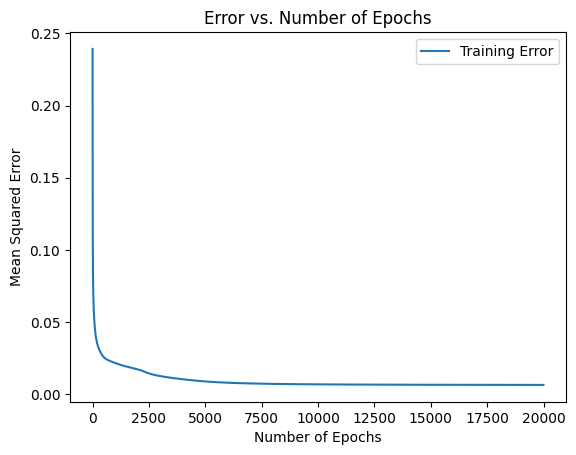

In [ ]:
import matplotlib.pyplot as plt
print(f"Training Accuracy: {accuracy_train:.4f}")
print(f"Test Accuracy: {accuracy_test:.4f}")

# Plot Error vs. Epochs
plt.plot(range(epochs), error_values, label="Training Error")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Error vs. Number of Epochs")
plt.legend()
plt.show()




```
# This is formatted as code
```

**Part C - Performance evaluation using Confusion Matrix **

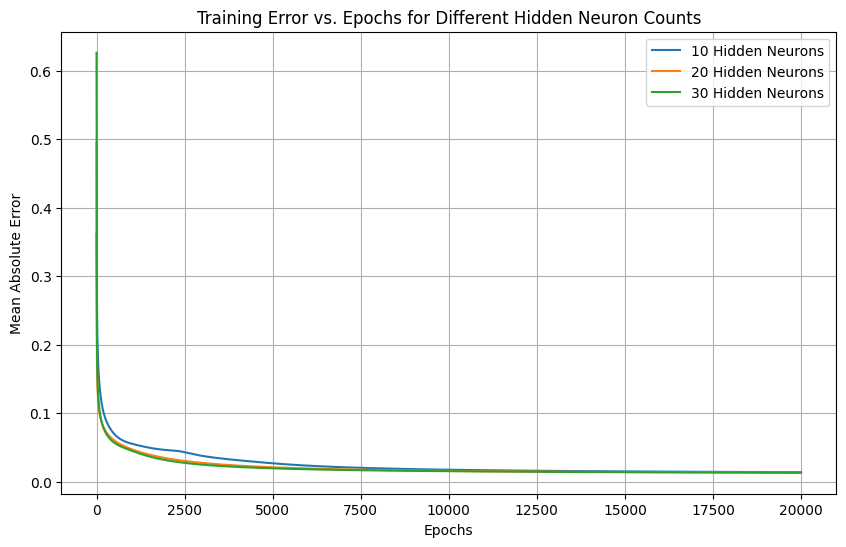


Performance for 10 Hidden Neurons:
Accuracy: 0.9540
Precision: 0.9412
Recall: 0.9796
F1-Score: 0.9600
Confusion Matrix:
[[48  3]
 [ 1 35]]

Performance for 20 Hidden Neurons:
Accuracy: 0.9425
Precision: 0.9231
Recall: 0.9796
F1-Score: 0.9505
Confusion Matrix:
[[48  4]
 [ 1 34]]

Performance for 30 Hidden Neurons:
Accuracy: 0.9425
Precision: 0.9231
Recall: 0.9796
F1-Score: 0.9505
Confusion Matrix:
[[48  4]
 [ 1 34]]


In [ ]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def confusion_matrix_manual(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

def accuracy_manual(y_true, y_pred):
    return np.mean(y_true == y_pred)

def precision_manual(tp, fp):
    return tp / (tp + fp) if (tp + fp) != 0 else 0

def recall_manual(tp, fn):
    return tp / (tp + fn) if (tp + fn) != 0 else 0

def f1_score_manual(precision, recall):
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0


def train_and_evaluate(X_train, y_train, X_test, y_test, hidden_neurons):
    input_neurons = X_train.shape[1]
    output_neurons = 1

    np.random.seed(42)
    W1 = np.random.randn(input_neurons, hidden_neurons)
    b1 = np.zeros((1, hidden_neurons))
    W2 = np.random.randn(hidden_neurons, output_neurons)
    b2 = np.zeros((1, output_neurons))

    epochs = 20000
    learning_rate = 0.01
    error_history = []

    for epoch in range(epochs):
        hidden_input = np.dot(X_train, W1) + b1
        hidden_output = sigmoid(hidden_input)
        final_input = np.dot(hidden_output, W2) + b2
        final_output = sigmoid(final_input)
        error = y_train.reshape(-1, 1) - final_output
        error_history.append(np.mean(np.abs(error)))
        d_output = error * sigmoid_derivative(final_output)
        d_hidden = np.dot(d_output, W2.T) * sigmoid_derivative(hidden_output)
        W2 += learning_rate * np.dot(hidden_output.T, d_output)
        b2 += learning_rate * np.sum(d_output, axis=0, keepdims=True)
        W1 += learning_rate * np.dot(X_train.T, d_hidden)
        b1 += learning_rate * np.sum(d_hidden, axis=0, keepdims=True)

    hidden_input_test = np.dot(X_test, W1) + b1
    hidden_output_test = sigmoid(hidden_input_test)
    final_input_test = np.dot(hidden_output_test, W2) + b2
    y_pred_prob = sigmoid(final_input_test)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    tp, tn, fp, fn = confusion_matrix_manual(y_test, y_pred)
    accuracy = accuracy_manual(y_test, y_pred)
    precision = precision_manual(tp, fp)
    recall = recall_manual(tp, fn)
    f1 = f1_score_manual(precision, recall)
    cm = np.array([[tp, fp], [fn, tn]])

    return accuracy, precision, recall, f1, cm, error_history

# Train and evaluate for 10, 20, and 30 hidden neurons
hidden_neurons_counts = [10, 20, 30]
results = {}
plt.figure(figsize=(10, 6))

for neurons in hidden_neurons_counts:
    accuracy, precision, recall, f1, cm, error_history = train_and_evaluate(X_train, y_train, X_test, y_test, neurons)
    results[neurons] = {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1-score": f1,
        "confusion_matrix": cm,
        "error_history": error_history
    }
    plt.plot(error_history, label=f'{neurons} Hidden Neurons')

plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training Error vs. Epochs for Different Hidden Neuron Counts')
plt.legend()
plt.grid(True)
plt.show()

for neurons, metrics in results.items():
    print(f"\nPerformance for {neurons} Hidden Neurons:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1-score']:.4f}")
    print(f"Confusion Matrix:\n{metrics['confusion_matrix']}")